In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada/Reto Titanic/train.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df[df['Embarked'].notna()]

In [ ]:
df=df.drop(['Cabin','Name','Ticket','PassengerId'],axis = 1)

In [ ]:
df['Sex'].unique().tolist()

['male', 'female']

In [ ]:
from sklearn import preprocessing
leSex = preprocessing.LabelEncoder()
leSex.fit(df['Sex'].unique().tolist())
leEmb = preprocessing.LabelEncoder()
leEmb.fit(df['Embarked'].unique().tolist())

LabelEncoder()

In [ ]:
df['Sex'] = leSex.transform(df['Sex'])
df['Embarked'] = leEmb.transform(df['Embarked'])

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


In [ ]:
df['Age'].fillna(df['Age'].median(),inplace = True)

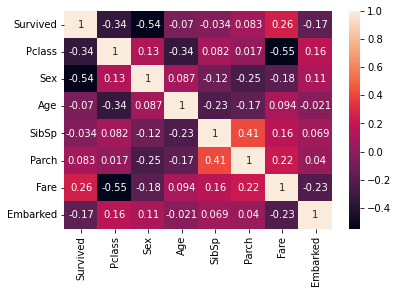

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [ ]:
df_kmeans = df.drop(['Survived'], axis = 1)

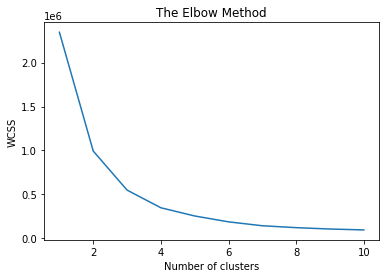

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_kmeans)
    wcss.append(kmeans.inertia_) #WCSS = within cluster sum of squares

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kmeans)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['Survived'], y_kmeans)

array([[ 14, 535],
       [ 39, 301]])

## Sex, Fare, Class

In [ ]:
df_1 = df_kmeans.drop(['Embarked','Parch','SibSp','Age'],axis = 1)

In [ ]:
df_1.head(1)

,Pclass,Sex,Fare
0,3,1,7.25


In [ ]:
kmeans3 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans3 = kmeans3.fit_predict(df_1)

In [ ]:
df_3 = df_1.values

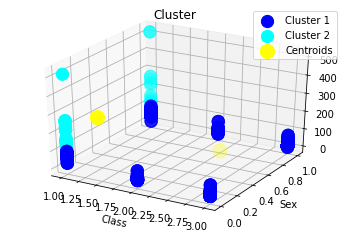

In [ ]:
# Creamos la figura
fig = plt.figure()

# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

col = ['cyan','green','blue']
#Agregamos los puntos
for i in range(0,2):
  x = df_3[y_kmeans3 == i, 0]
  y = df_3[y_kmeans3 == i, 1]
  z = df_3[y_kmeans3 == i, 2]
  clasi = 'Cluster '+str(i+1)
  ax1.scatter(x, y, z, c = col[i-1], s = 150,label = clasi)

# Agregamos los centros
x = kmeans3.cluster_centers_[:, 0]
y = kmeans3.cluster_centers_[:, 1]
z = kmeans3.cluster_centers_[:, 2]
ax1.scatter(x, y, z, c = 'yellow', s = 200, label = 'Centroids')

plt.rcParams["figure.figsize"] = (15,12)
plt.title('Cluster')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Sex')

plt.show()

In [ ]:
confusion_matrix(df['Survived'], y_kmeans3)

array([[535,  14],
       [301,  39]])

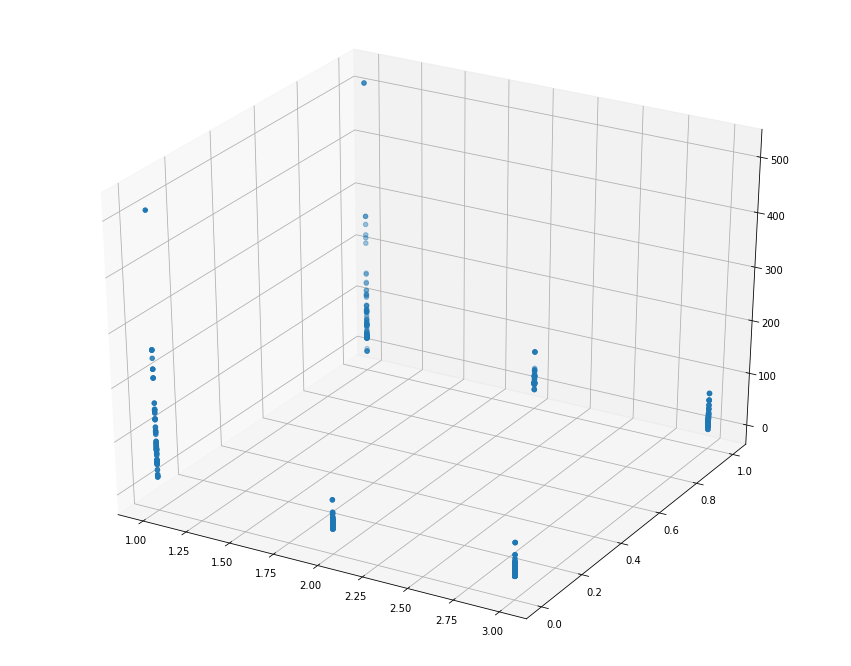

In [ ]:
zdata = 15 * np.random.random(889)
ax = plt.axes(projection='3d')
ax.scatter3D(df_1['Pclass'], df_1['Sex'], df_1['Fare'], cmap='Greens')

## Age y Fare

In [ ]:
df_2 = df[['Age','Fare']]

In [ ]:
df_2 = df_2.values

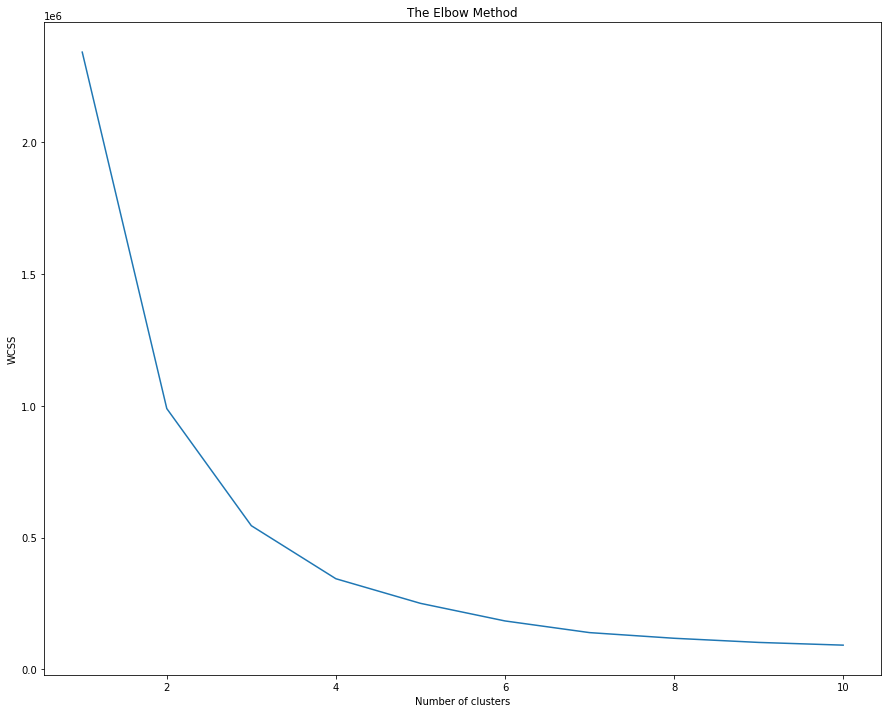

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_2.fit(df_2)
    wcss.append(kmeans_2.inertia_) #WCSS = within cluster sum of squares

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(df_2)

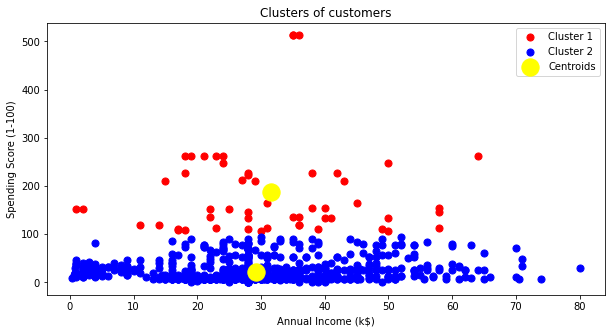

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_2[y_kmeans2 == 0, 0], df_2[y_kmeans2 == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df_2[y_kmeans2 == 1, 0], df_2[y_kmeans2 == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
#plt.scatter(df_2[y_kmeans2 == 2, 0], df_2[y_kmeans2 == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(df_2[y_kmeans2 == 3, 0], df_2[y_kmeans2 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
confusion_matrix(df['Survived'], y_kmeans2)

array([[ 14, 535],
       [ 39, 301]])

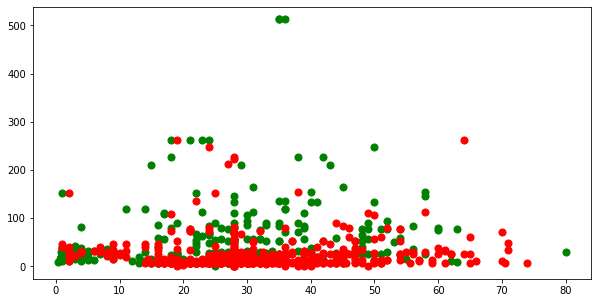

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived']==1]['Fare'], c= 'green',s =50)
ax.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived']==0]['Fare'], c= 'red',s =50)

# Random Forest

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada/Reto Titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada/Reto Titanic/test.csv')
df_val = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial Avanzada/Reto Titanic/gender_submission.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test['Survived'] = df_val['Survived']

In [ ]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1


In [ ]:
df_train = df_train[df_train['Embarked'].notna()]
df_test = df_test[df_test['Embarked'].notna()]

In [ ]:
df_train=df_train.drop(['Cabin','Name','Ticket','PassengerId'],axis = 1)
df_test=df_test.drop(['Cabin','Name','Ticket','PassengerId'],axis = 1)

In [ ]:
from sklearn import preprocessing
leSex = preprocessing.LabelEncoder()
leSex.fit(df_train['Sex'].unique().tolist())
leEmb = preprocessing.LabelEncoder()
leEmb.fit(df_train['Embarked'].unique().tolist())

LabelEncoder()

In [ ]:
leSex_1 = preprocessing.LabelEncoder()
leSex_1.fit(df_test['Sex'].unique().tolist())
leEmb_1 = preprocessing.LabelEncoder()
leEmb_1.fit(df_test['Embarked'].unique().tolist())

LabelEncoder()

In [ ]:
df_train['Sex'] = leSex.transform(df_train['Sex'])
df_train['Embarked'] = leEmb.transform(df_train['Embarked'])

In [ ]:
df_test['Sex'] = leSex_1.transform(df_test['Sex'])
df_test['Embarked'] = leEmb_1.transform(df_test['Embarked'])

In [ ]:
df_train['Age'].fillna(df_train['Age'].median(),inplace = True)
df_test['Age'].fillna(df_test['Age'].median(),inplace = True)

In [ ]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


In [ ]:
df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,1


In [ ]:
df_test = df_test.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

X_train = df_train.drop(['Survived'], axis = 1) # Removed feature "sepal length"
y_train = df_train['Survived']   

X_test = df_test.drop(['Survived'], axis = 1) 
y_test = df_test['Survived']    

#X_test = df_test
                             
# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [ ]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64

Decision Tree

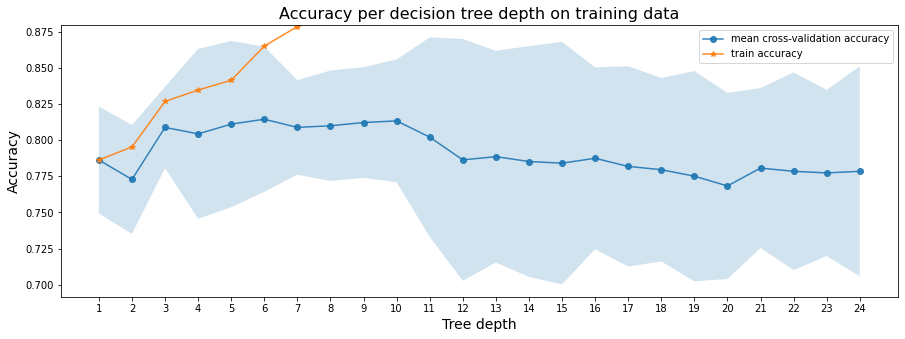

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

start_time = datetime.now()
clf = DecisionTreeClassifier(max_depth = 5,random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

end_time = datetime.now()

tiempo = end_time-start_time


print(tiempo)

Accuracy: 0.9568345323741008
0:00:00.010869


In [ ]:
len(y_test)

417

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
y_test_1 = y_test.to_list()

In [ ]:
for i in range(len(y_pred)):
  print('Real: ',y_test_1[i],' | Pred: ', y_pred[i])

Real:  0  | Pred:  0
Real:  1  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  1  | Pred:  1
Real:  1  | Pred:  1
Real:  0  | Pred:  0
Real:  0  | Pred:  0
Real:  0  | P

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[258,   7],
       [ 11, 141]])

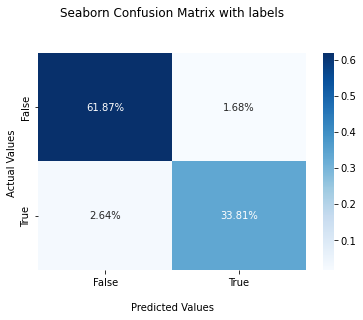

In [ ]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

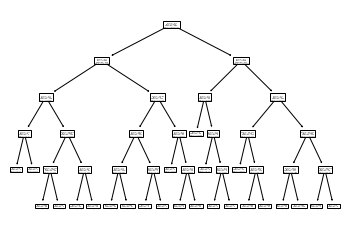

<Figure size 432x288 with 0 Axes>

In [ ]:
tree.plot_tree(clf)
plt.show()
plt.savefig('out.pdf')

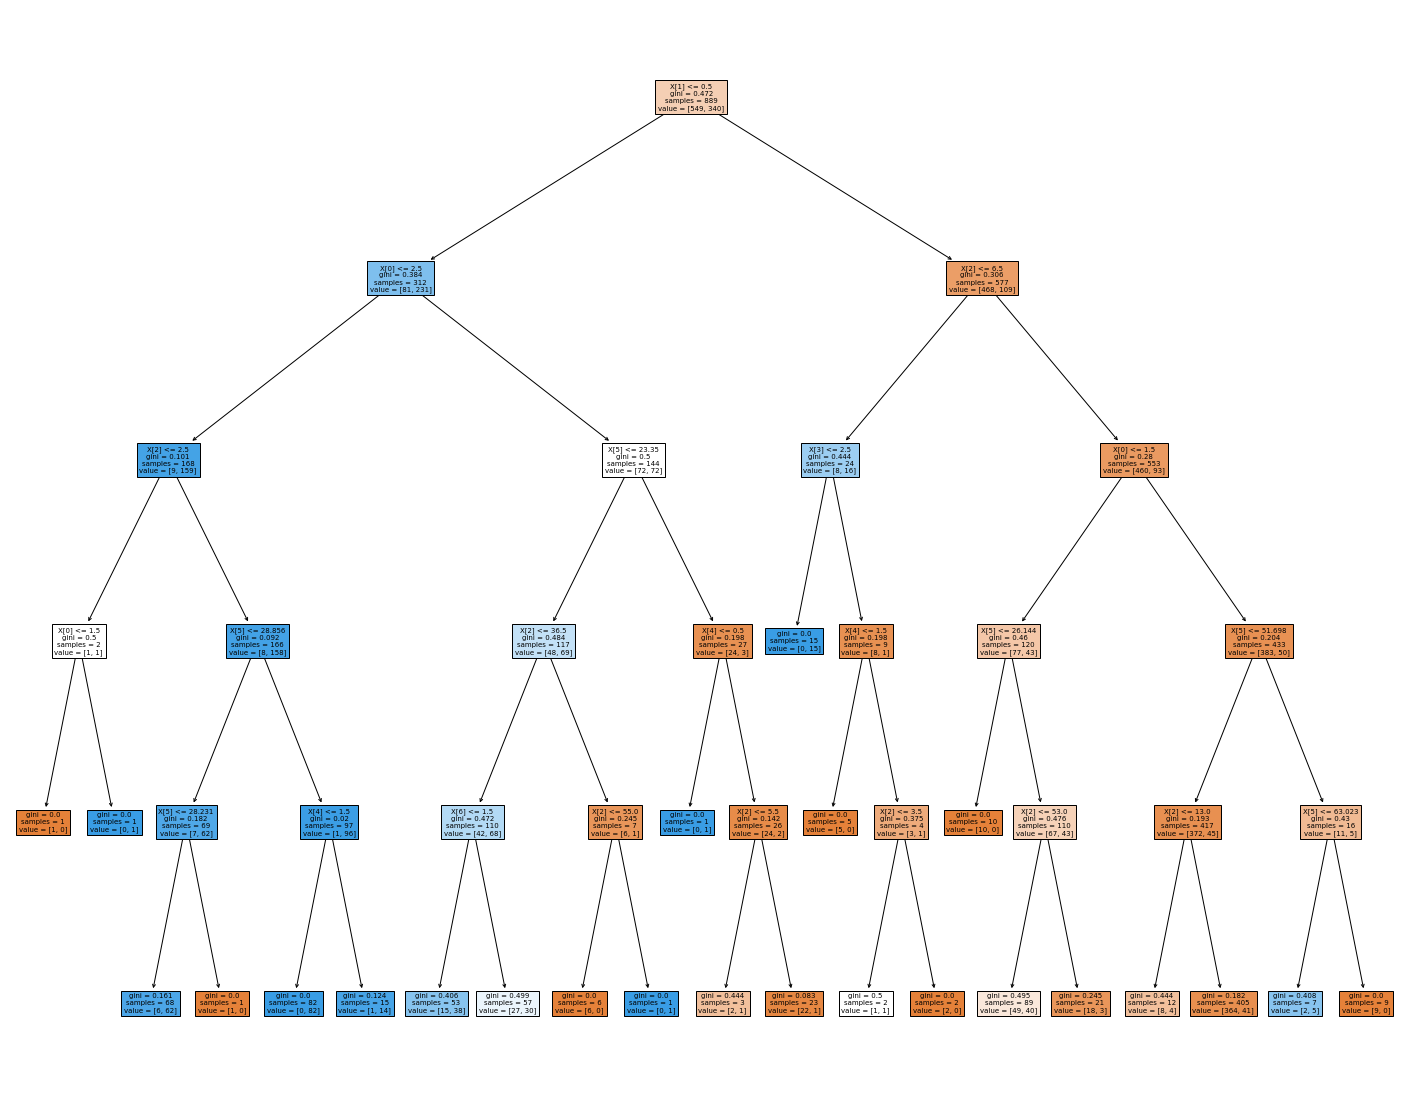

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   
                   filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

In [ ]:
start_time = datetime.now()
clf = DecisionTreeClassifier(criterion = "entropy",max_depth = 5,random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
end_time = datetime.now()


tiempo = end_time-start_time

print(tiempo)

Accuracy: 0.9280575539568345
0:00:00.031686


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[247,  18],
       [ 12, 140]])

Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth = 5,n_estimators=100,random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8920863309352518


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[256,   9],
       [ 36, 116]])

In [ ]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
y_predF = modelF.predict(X_test)

In [ ]:
#from sklearn.model_selection import GridSearchCV
#n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 8, 15, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10] 

#hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
  #            min_samples_split = min_samples_split, 
 #            min_samples_leaf = min_samples_leaf)

#gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
               #       n_jobs = -1)
#bestF = gridF.fit(X_train, y_train)

In [ ]:
#bestF.best_params_

In [ ]:
start_time = datetime.now()
clf=RandomForestClassifier(max_depth = 5,min_samples_leaf =2, min_samples_split=15, n_estimators=100,random_state=5,max_features = 4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
end_time = datetime.now()

tiempo = end_time-start_time

print(tiempo)

Accuracy: 0.9232613908872902
0:00:00.551618


In [ ]:
clf=RandomForestClassifier(criterion = "entropy", max_depth = 5,min_samples_leaf =2, min_samples_split=15, n_estimators=100,random_state=5,max_features = 4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.920863309352518


Random Forest Important features

In [ ]:
names = list(X_test.columns)
feature_imp = pd.Series(clf.feature_importances_,index=names).sort_values(ascending=False)
feature_imp

Sex         0.465909
Fare        0.178516
Pclass      0.151979
Age         0.123583
SibSp       0.041543
Parch       0.020115
Embarked    0.018354
dtype: float64

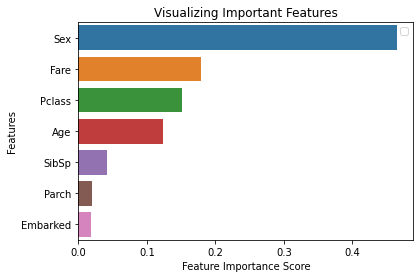

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
X_test_1 = X_test.drop(['Embarked','Parch'], axis = 1)
X_train_1 = X_train.drop(['Embarked','Parch'], axis = 1)

In [ ]:

#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth = 5,min_samples_leaf =2, min_samples_split=15, n_estimators=100,random_state=5,max_features = 4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_1,y_train)

y_pred=clf.predict(X_test_1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9136690647482014


# Red Neuronal

In [ ]:
from tensorflow import keras

start_time = datetime.now()
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(7,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=150,batch_size=18)
predict=model.predict(X_test)

end_time = datetime.now()

tiempo = end_time-start_time

print(tiempo)

Epoch 1/150
50/50 [==============================] - 1s 2ms/step - loss: 1.0886 - accuracy: 0.6817
Epoch 2/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6794
Epoch 3/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.7008
Epoch 4/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.7030
Epoch 5/150
50/50 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.7143
Epoch 6/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7109
Epoch 7/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7087
Epoch 8/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7154
Epoch 9/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7199
Epoch 10/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7177
Epoch 11/